# Analysis of Red Wine and White Wine


1. The purpose of this analysis
2. Datas for Red Wine
3. Datas for White Wine

## The purpose of this analysis ##
> By conducting this analysis, I would like to find what component has a positive and negative impact on the 
> wine quality. Then I would like to compare the analysis of red and white wine.
> I am not familar with chemistry so I only know alcohol in the column. So first, I will start looking at the relationship between alcohol and the quality. 

## Datas for Red Wine

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
red = pd.read_csv('data/raw/winequality-red.csv',sep=';')
white = pd.read_csv('data/raw/winequality-white.csv',sep=';')
red 
from project_function import load_and_process
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


> This is the data for red wine.

> Now, I group the data by the quality to do rough analysis to start off. 
> As I mentioned above, I am interested in the relationship bewtween alcohol and the quality. So I create a column
> that has a result of (quality/alcohol), so I can see if they hava positive or negative relationship.

In [315]:
df2=load_and_process(red)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,slope_quality_alchohol
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,0.303286
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,0.392724
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,0.507573
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,0.569801
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,0.614855
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,0.668146


> Now, as you can see, 

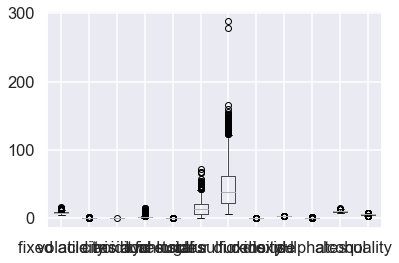

In [316]:
boxplot=red.boxplot()

> I have noticed that the values varies in wide range so it is hard to see the each column has the outlier or not. 
> So I decided to create a boxplot for each column.

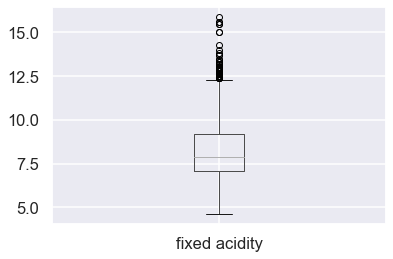

In [317]:
boxplot_density=red.boxplot(column="fixed acidity") 

> For fixed acidity, I treat data above about 14.3 as outlier

In [318]:
red = red[red['fixed acidity']<14.3]
red.shape

(1591, 12)

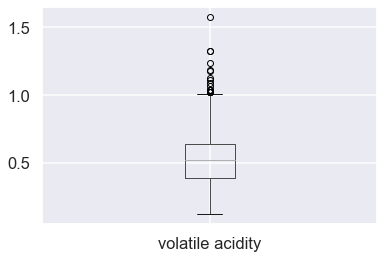

In [319]:
boxplot1=red.boxplot(column="volatile acidity")

> For volatile acidity, I treat data above 1.4 as outlier

In [320]:
red = red[red['volatile acidity']<1.4]
red.shape

(1590, 12)

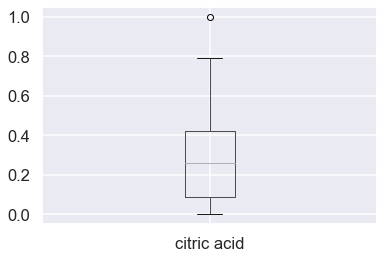

In [321]:
boxplot=red.boxplot(column="citric acid") 

> For citric acid, I treat data above 0.8 as outlier

In [322]:
red = red[red['citric acid']<0.8]
red.shape

(1589, 12)

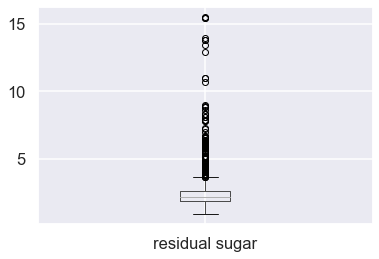

In [323]:
boxplot=red.boxplot(column="residual sugar") 


> For residual sugar, I treat data above 10 as outlier

In [324]:
red = red[red['residual sugar']<10]
red.shape

(1578, 12)

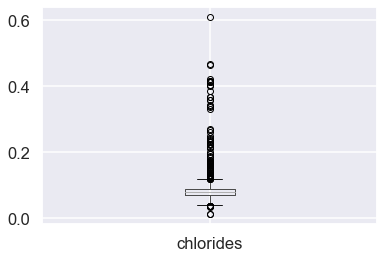

In [325]:
boxplot=red.boxplot(column="chlorides") 

> For chlorides, I treat data above 0.5 as outlier

In [326]:
red = red[red['chlorides']<0.5]
red.shape

(1577, 12)

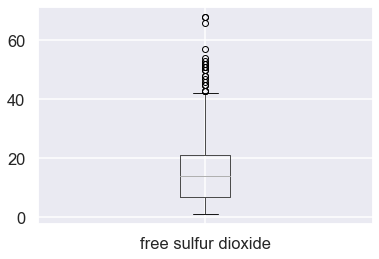

In [327]:
boxplot=red.boxplot(column="free sulfur dioxide") 

> For free sulfur dioxide, I treat data above 60 as outlier

In [328]:
red = red[red['free sulfur dioxide']<60]
red.shape

(1574, 12)

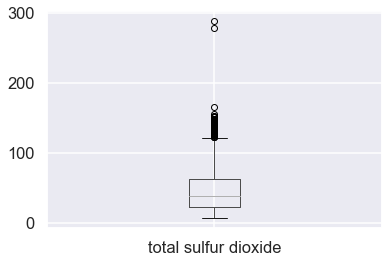

In [329]:
boxplot=red.boxplot(column="total sulfur dioxide") 

> For total sulfur dioxide, I treat data above 250 as outlier

In [330]:
red = red[red['total sulfur dioxide']<250]
red.shape

(1572, 12)

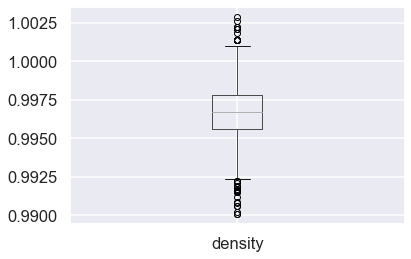

In [331]:
boxplot=red.boxplot(column="density") 

> I see some outliers but they are close to each other so I do not treat them as outliers and will not remove them

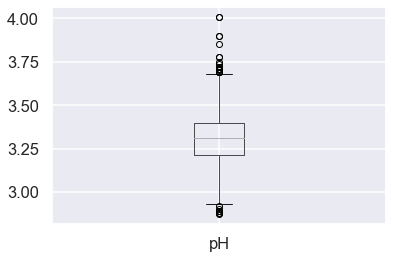

In [332]:
boxplot=red.boxplot(column="pH") 

> For pH, I will treat data above 3.8 as outliers

In [333]:
red = red[red['pH']<3.8]
red.shape

(1567, 12)

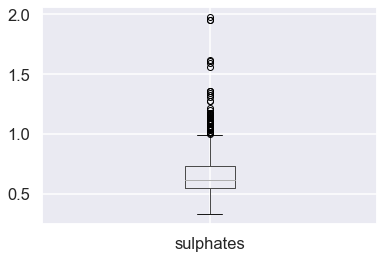

In [334]:
boxplot=red.boxplot(column="sulphates") 

> For sulphates, I treat data above 1.50 as outlier

In [335]:
red = red[red['sulphates']<1.50]
red.shape

(1560, 12)

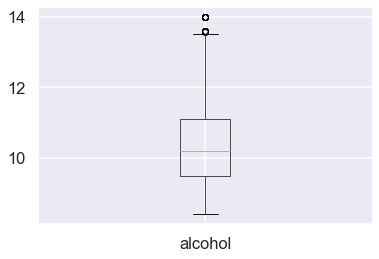

In [336]:
boxplot=red.boxplot(column="alcohol") 

> For alcohol, data above about 13.8 seems to be outlier.

In [337]:
red = red[red['alcohol']<13.8]
red.shape

(1553, 12)

> Now, I have smaller data since outliers have been dropped so I will group the data by quality again.

In [338]:
redgroup_by_quality = load_and_process(red)
redgroup_by_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,slope_quality_alchohol
quality,,,,,,,,,,,,
3,8.444444,0.807222,0.190000,2.694444,0.120889,11.666667,26.666667,0.997764,3.386667,0.588889,9.850000,0.306404
4,7.850000,0.708200,0.155200,2.488000,0.081760,12.080000,33.480000,0.996561,3.385600,0.569800,10.201000,0.394714
5,8.123423,0.577725,0.240526,2.443018,0.090940,16.701201,56.154655,0.997045,3.309520,0.612658,9.895045,0.507672
6,8.371405,0.497868,0.274572,2.371971,0.084651,15.389338,39.799677,0.996617,3.315299,0.669758,10.614917,0.570173
7,8.804663,0.405466,0.371295,2.666321,0.076907,13.875648,32.481865,0.996081,3.295544,0.742953,11.468998,0.614358
8,8.981250,0.419375,0.423125,2.662500,0.070500,12.000000,29.062500,0.995707,3.224375,0.766250,11.856250,0.680236


> We still can see the positive relationship between alcohol and quality. 

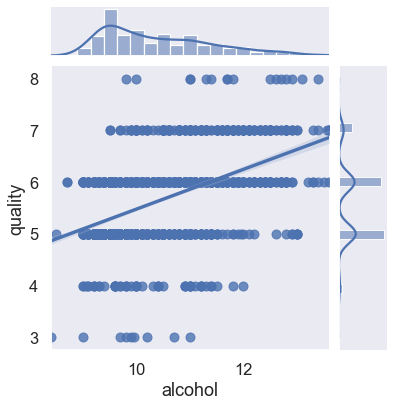

In [339]:
##plt.figure(figsize=(8,6))
p1 = sns.jointplot(data=red,x='alcohol',y='quality',kind='reg')
p1

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

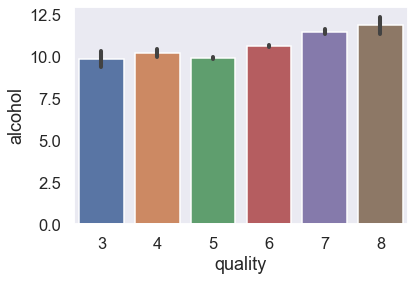

In [340]:
b1=sns.barplot(x='quality',y='alcohol',data=red)
b1

> It is true that as the quality gets higher, the amount of alcohol. Now I take a look at each quality and alcohol to find information I may miss in the join plot. 
> Quality of 3 and 5 seem to have almost the same amount of alcohol
> And 7 and 8 have similar amount of alcohol. 
> I would like to find the difference between quality 3 and quality 5.

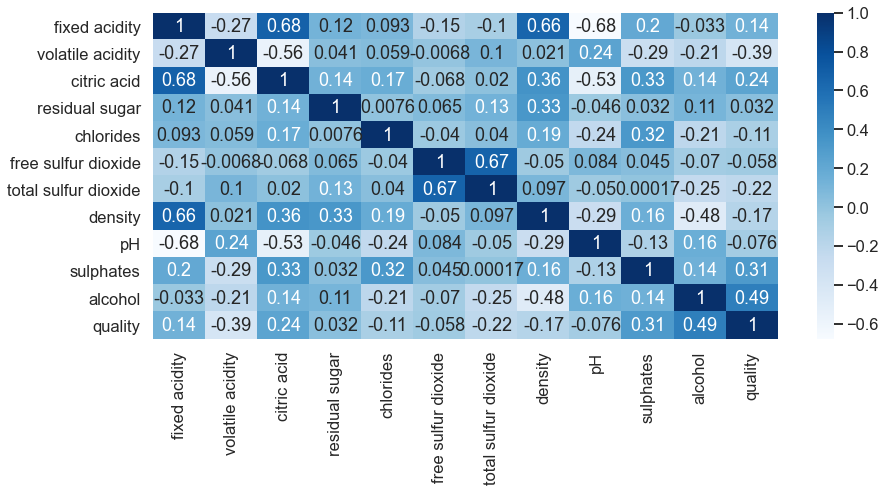

In [376]:
plt.figure(figsize=(14,6))
red_corr = red.corr()
red_heat=sns.heatmap(red_corr, annot=True,cmap='Blues')

> To find out the diferrence between quality 3 and 5, I got heatmap to find any correlationship between quality and other columns. The absolute value of correlationship of alcohol and quality is the highest value in other correlerationships with quality. I found the second largest absolute value at the corrrelationship between volatile acidity and quality. So let's tale a look at the relationship between volatile acidity and quality at qualoty 3 and 5.

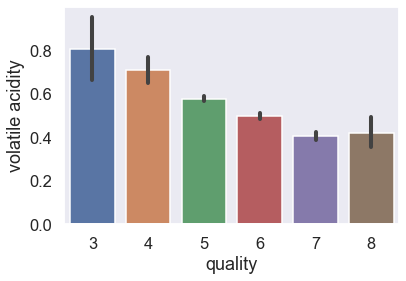

In [342]:
b2=sns.barplot(x='quality',y='volatile acidity',data=red)

> It is clear that there is a big gap of volatile acidity between quality 3 and 5. And there has a negative slope from quality 3 to 6. So volatile acidity is negatively correlated to quality. In order to prove that wines with higher amount of volatile acidity are categorized to lower quality even it has higer amount of alcohol, I created stripplots. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

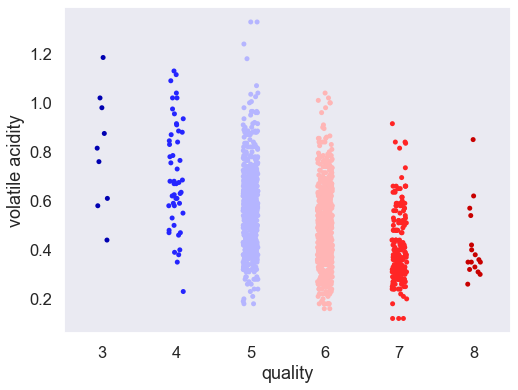

In [343]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='quality',y='volatile acidity',data=red, palette='seismic')


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

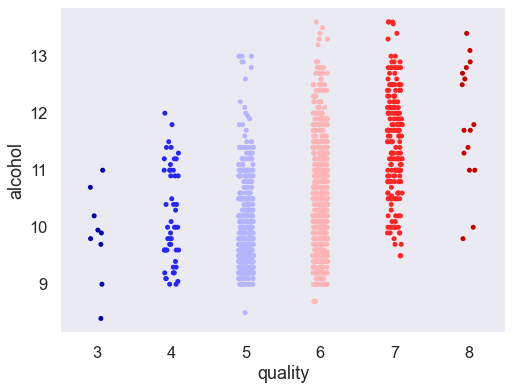

In [344]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='quality',y='alcohol',data=red, palette='seismic')

> As obviously, there are much less datas from quality 3 compared to quality 5 so they may not prove the state of wines with higher amount of volatile acidity are categorized to lower quality even it has higer amount of alcohol.
Then I found the number of datas from quality 6 and 7 are close and they can prive the hypothesis.
In the strip plot of volatile acidity dnd quality, the most of dots of quality 7 gather between 0.2 and 0.6 and the dots in strip plot of alcohol and quality of qualoty 7 are on 10 to 13. 
The most of dots of quality 6 in alcohol stripplot gather between 9 to 13 and the dots gather between 0.2 and 0.9 which is wider than quality 7.  So we can say that higher amount of volatile acidity can lower the grade of wine even they have high amount of alcohol. 

> Let's see if other column has a correlationship with quality.
As sulphates have the third largest absolute value with quality on the heatmap, I created a barplot of quality and sulphates. 

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

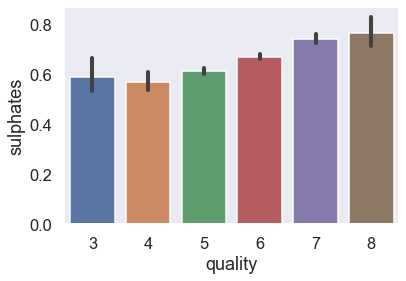

In [382]:
b3=sns.barplot(x='quality',y='sulphates',data=red)
b3

> Quality 3 has larger amount of sulphates than quality 4 does but quality 3 has much smaller datas compared to pther columns so we can say quality has positive relationship with suphates. Now I am interested to see the forth largest absolute value which is citric acid.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

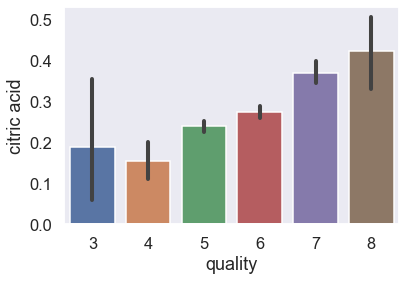

In [383]:
b3=sns.barplot(x='quality',y='citric acid',data=red)
b3

> Citric acid also has positive relationship between quality. 

> Now, let's take a look at the data of white wine. Like the data of red wine, I drop the outlier for each column. 

In [345]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


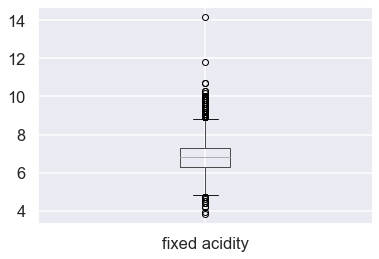

In [346]:
boxplot=white.boxplot(column="fixed acidity") 

In [347]:
white = white[white['fixed acidity']<11]

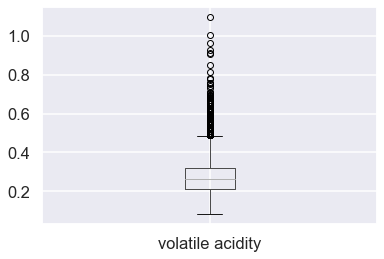

In [348]:
boxplot=white.boxplot(column="volatile acidity") 

In [349]:
white =white[white['volatile acidity']<1.0]

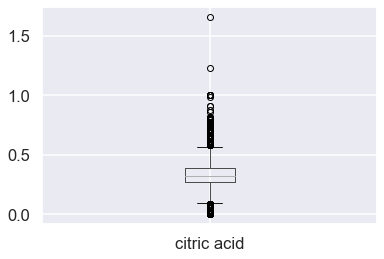

In [350]:
boxplot=white.boxplot(column="citric acid") 

> There is outlier above 0.38 and below 0.32 so I drop them.

In [351]:
white = white[white['citric acid']<1.0]

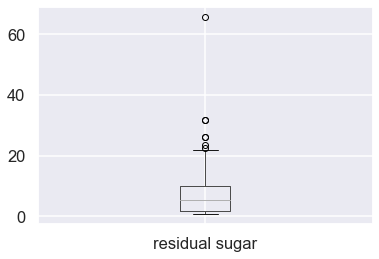

In [352]:
boxplot=white.boxplot(column="residual sugar") 

In [353]:
white =white[white['residual sugar']<24]

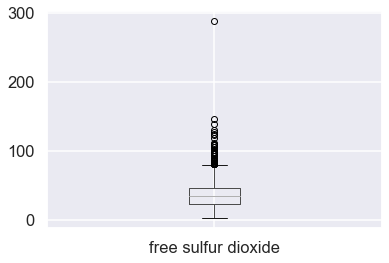

In [354]:
boxplot=white.boxplot(column="free sulfur dioxide") 

> There is outlier above 50 so I drop it.

In [355]:
white = white[white['free sulfur dioxide']<200]

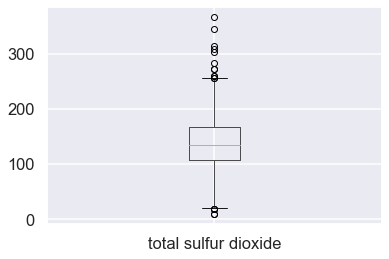

In [356]:
boxplot=white.boxplot(column="total sulfur dioxide") 

In [357]:
white = white[white['total sulfur dioxide']<300]

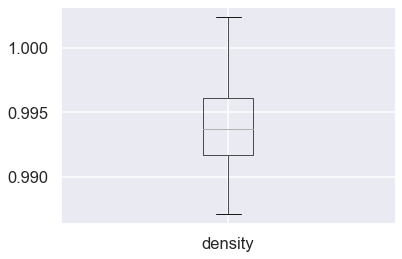

In [358]:
boxplot=white.boxplot(column="density") 

> There is no outlier so I do not drop any data. 

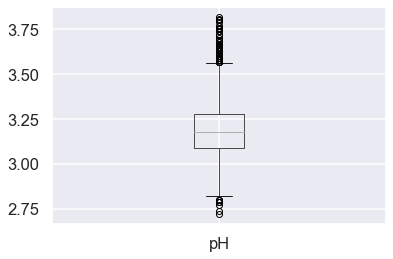

In [359]:
boxplot=white.boxplot(column="pH") 

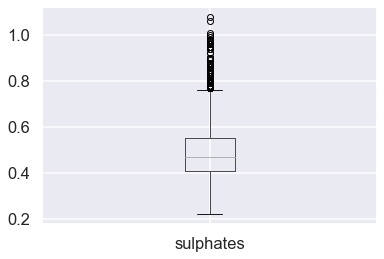

In [360]:
boxplot=white.boxplot(column="sulphates") 

In [361]:
white = white[white['sulphates']<1.0]

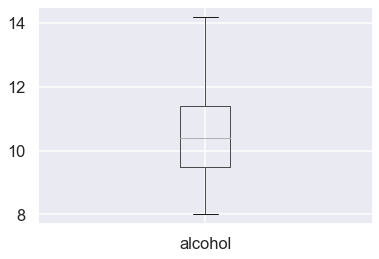

In [362]:
boxplot=white.boxplot(column="alcohol") 

> There is no outlier so I do not drop any data. 

In [367]:
white_grouped_by_quality = load_and_process(white)
white_grouped_by_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,slope_quality_alchohol
quality,,,,,,,,,,,,
3,7.400000,0.320937,0.345000,6.018750,0.056313,36.281250,135.937500,0.994521,3.193750,0.456250,10.293750,0.296189
4,7.118634,0.372888,0.304161,4.649689,0.050230,23.388199,125.009317,0.994285,3.182857,0.476087,10.138199,0.398155
5,6.931246,0.301917,0.337268,7.333379,0.051518,36.317275,150.518238,0.995258,3.168858,0.481955,9.809002,0.513283
6,6.829867,0.259606,0.335721,6.367247,0.045204,35.681173,136.928997,0.993918,3.188869,0.490545,10.571675,0.574092
7,6.735324,0.262827,0.325677,5.185893,0.038203,34.113197,125.119454,0.992453,3.213902,0.502446,11.367046,0.623706
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000,0.696992
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,0.743505


> As red wine, slope_quality_alchohol tells us there is positive relationship between alcohol and quality.
To  make it easy to see, I get a jointplot. 

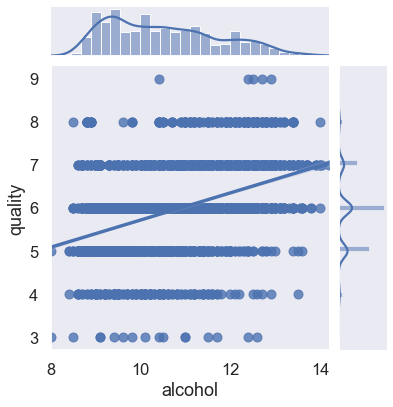

In [368]:
p1 = sns.jointplot(data=white,x='alcohol',y='quality',kind='reg')
p1

> The slope looks similar to red wine since alcohol and quality have positive relationship. 
Now, I would like to compare the each grade with alcohol value.


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

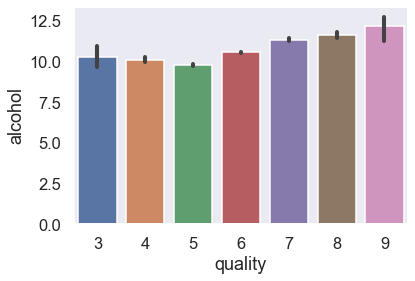

In [369]:
wb1=sns.barplot(x='quality',y='alcohol',data=white)
wb1

> The joint plot tells us there is a positive relationship between alcohol and the quality. However, barplot tells us there is a negative relationship between quality 3 and 5 then it turns to be a positive relationship from 5 to 9. 
I wondered the number of data from each quality so I got stripplot. 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

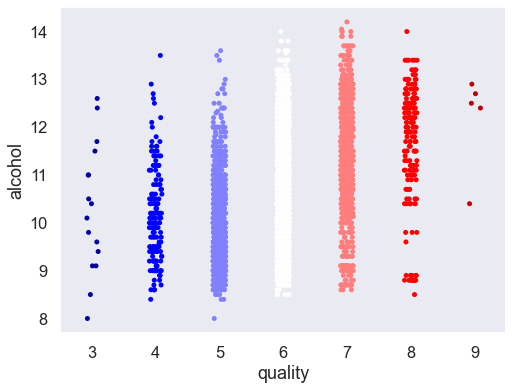

In [371]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='quality',y='alcohol',data=white, palette='seismic')

> The barplot shows the negative relationship from quality 3 to 5, but qualoty 3, 4 and have a big gap of numbers of data. 
So it is difficult to prove the negative relationship. 
On the pther hand, quality 5 to 7 have similar numbers of data so we can say there is positive relationship between quality 5 to 7. 
I also noticed that the datas of quality 6 and 7 spread from 8.5 to 13.5 so I was interested in what categolized these wines to quality 6 or 7. 
Then I again created a heatmap to see any correlationship.


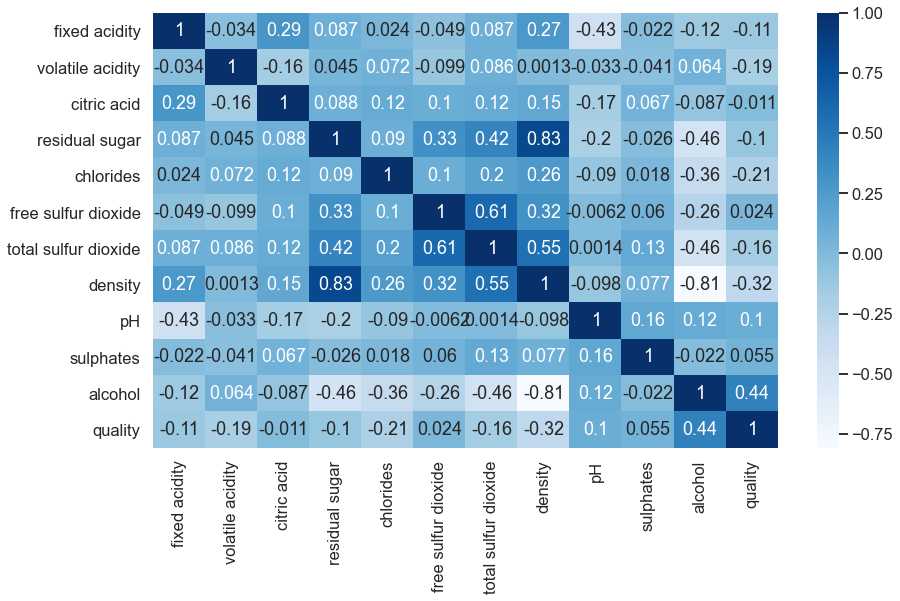

In [375]:
plt.figure(figsize=(14,8))
white_corr = white.corr()
red_heat=sns.heatmap(white_corr, annot=True,cmap='Blues')

> Unlike the red wine, the second largest absolute value of corrrelationship between alcohol is density. 
Now I created barplot of alcohl and density to analyse the difference between quality 6 and 7.

<AxesSubplot:xlabel='quality', ylabel='density'>

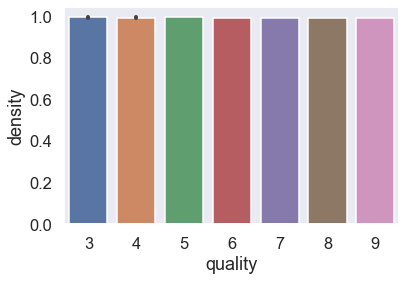

In [377]:
wb2=sns.barplot(x='quality',y='density',data=white)
wb2

> It seems all quality have similar value of density including quality 6 and 7. The absolute value of corerelationship of density and quality is the second largest but it does not affect to quality 6 and 7. 
Now, I try chlorides. 

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

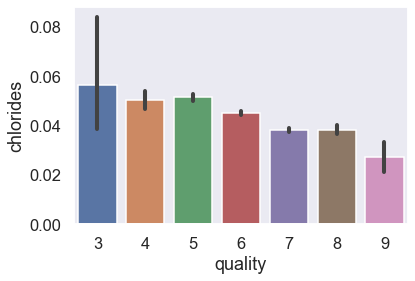

In [380]:
wb2=sns.barplot(x='quality',y='chlorides',data=white)
wb2

> This barplot does not show any consistent relationship through the all quality, but quality 6 has higher amount of chlorides than quality 7. But again it does not prove if wine contains higher value of chlorides, it is categorized as higer quality of wine. 

> As you may have noticed, the correlationships between quality and any components of wine are not strong enough to prove positive or negative relationship unlike red wines.  
In addtion, I could see red wine has strong correlationship with at least 4 columns while white wine does not even have correlationship between quality and alcohol and alcohol is the largest absolute value on the heatmap.  